# Recommendation System - Part 1
Product popularity based recommendation system targeted at new customers

# Importing libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use("ggplot")

import sklearn 
from sklearn.decomposition import TruncatedSVD

# Loading the dataset

In [2]:
amazon_ratings=pd.read_csv("C:\\Users\\geeth\\Downloads\\archive.zip")

In [3]:
amazon_ratings.dropna()
amazon_ratings.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [4]:
amazon_ratings.shape

(2023070, 4)

# Finding the most popular products based on the count of ratings 

In [5]:
popular_products=pd.DataFrame(amazon_ratings.groupby("ProductId")["Rating"].count())
most_popular=popular_products.sort_values("Rating",ascending=False)
most_popular.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


# Plotting bar chart of the 30 most popular products 

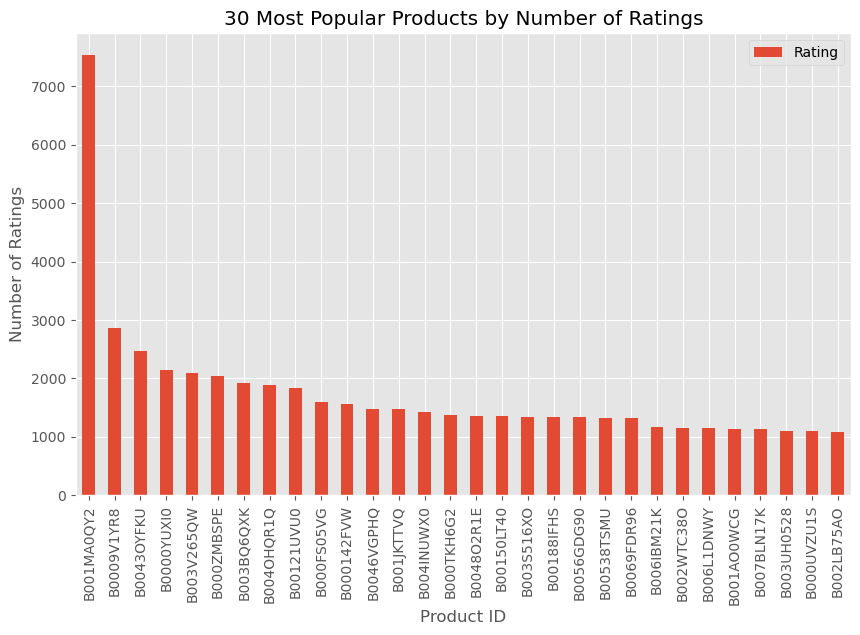

In [6]:
most_popular.head(30).plot(kind="bar", y="Rating", figsize=(10, 6), 
                           xlabel="Product ID", ylabel="Number of Ratings", 
                           title="30 Most Popular Products by Number of Ratings")
plt.xticks(rotation=90)
plt.show()

# Analysis
The bar chart displays the 30 most popular products based on the count of ratings. For example, ProductId "B001MA0QY2" has received over 7000 ratings, indicating high user engagement with this product. Similarly, the next most popular product, with ProductId "B0009V1YR8", has received approximately 3000 ratings. While the count of ratings reflects user interactions and interest in these products, it does not directly represent the count of actual sales transactions.

# Recommendation System - Part 2
Model-based collaborative filtering system

In [7]:
#Subset of Amazon Ratings
amazon_ratings1=amazon_ratings.head(10000)

# Utility matrix

In [8]:
ratings_utility_matrix=amazon_ratings1.pivot_table(values="Rating",index="UserId",
                                                   columns="ProductId",fill_value=0)
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
ratings_utility_matrix.shape

(9697, 886)

In [10]:
#Transposing the matrix
X=ratings_utility_matrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X.shape

(886, 9697)

In [12]:
#Unique products in subset of data
X1=X
print(len(X1))

886



# Decomposing the Matrix

In [13]:
SVD=TruncatedSVD(n_components=10)
decomposed_matrix=SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

# Correlation Matrix

In [14]:
correlation_matrix=np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

# Isolating ProductId 6117036094 from the Correlation Matrix
Assuming the customer buys ProductId 6117036094 (randomly chosen)

In [15]:
X.index[99]

'6117036094'

In [16]:
#Index of ProductId purchased by customer
i="6117036094"
product_names=list(X.index)
product_ID=product_names.index(i)
product_ID

99

In [17]:
correlation_product_ID=correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

# Recommending top 10 highly correlated products in sequence

In [19]:
i="6117036094"
Recommend=list(X.index[correlation_product_ID>0.90])

#Remove the item already bought by the customer
Recommend.remove(i)

Recommend[0:9]

['1304139212',
 '130414643X',
 '1304174867',
 '1304174905',
 '1304511111',
 '1304511154',
 '1304622452',
 '1304622657',
 '1304622665']

Here are the top 10 products to be displayed by the recommendation system to the above customer based on the purchase history of other customers in the website.

# Recommendation System Part-3
For a business without any user-item purchase history, a search engine based recommendation system can be designed for users. The product recommendations can be based on textual clustering analysis given in product description.

# Importing Libraries

In [41]:
import re
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# Item to item based recommendation system based on product description
Applicable when business is setting up its E-commerce website for the first time

In [42]:
product_descriptions=pd.read_csv("C:\\Users\\geeth\\OneDrive\\Desktop\\ML\\product_descriptions.csv")

In [22]:
product_descriptions.shape

(124428, 2)

In [23]:
product_descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


# Checking for missing values

In [24]:
#Missing values
product_descriptions=product_descriptions.dropna()
product_descriptions.shape

(124428, 2)

# Preprocess the Product Descriptions

In [25]:
# Load product descriptions data
product_descriptions = pd.read_csv("C:\\Users\\geeth\\OneDrive\\Desktop\\ML\\product_descriptions.csv")

# Drop missing values
product_descriptions = product_descriptions.dropna()

# Define stop words
stop_words = set(stopwords.words('english'))

# Tokenize and clean product descriptions
def preprocess_text(text):
    # Remove punctuation and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I | re.A)
    # Tokenize
    tokens = text.lower().split()
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

product_descriptions['cleaned_description'] = product_descriptions[
    'product_description'].apply(preprocess_text)

# Preview cleaned descriptions
print(product_descriptions['cleaned_description'].head())

0    [angles, make, joints, stronger, also, provide...
1    [behr, premium, textured, deckover, innovative...
2    [classic, architecture, meets, contemporary, d...
3    [grape, solar, watt, polycrystalline, pv, sola...
4    [update, bathroom, delta, vero, singlehandle, ...
Name: cleaned_description, dtype: object


# Train a Word2Vec Model

In [26]:
# Train Word2Vec model
word2vec_model = Word2Vec(sentences=product_descriptions['cleaned_description'],
                          vector_size=100, window=5, min_count=1, workers=4)

# Save the model (optional)
word2vec_model.save("word2vec_model.model")

# Cluster the Product Descriptions Using KMeans with Word2Vec Embeddings

In [27]:
# Get word embeddings for each description
description_embeddings = []
for description in product_descriptions['cleaned_description']:
    embeddings = [word2vec_model.wv[
        word] for word in description if word in word2vec_model.wv]
    if embeddings:
        aggregated_embedding = np.mean(embeddings, axis=0)
        description_embeddings.append(aggregated_embedding)

# Ensure all embeddings have the same length
X = np.array(description_embeddings)
if len(X) == 0:
    print("No embeddings generated. Please check your preprocessing steps.")
else:
    # Cluster descriptions using KMeans
    kmeans = KMeans(n_clusters=10, init='k-means++')
    y_kmeans = kmeans.fit_predict(X)

# Print Top Words in Each Cluster Based on Word2Vec Embeddings

In [29]:
def print_cluster(cluster_id):
    print(f"Cluster {cluster_id}:")
    cluster_center = kmeans.cluster_centers_[cluster_id]
    most_similar_words = word2vec_model.wv.similar_by_vector(cluster_center, 
                                                             topn=10)
    for word, similarity in most_similar_words:
        print(word)

# Print top words in each cluster
for i in range(10):
    print_cluster(i)

Cluster 0:
suhoned
flagstone
border
quartzitic
informationlakeshore
flooringuse
informationdurango
expressed
floorthis
manufacturingfits
Cluster 1:
chisel
jaws
punches
pliers
cutter
cutters
jig
notches
rebar
serrated
Cluster 2:
faucet
tub
bathroom
sink
bath
bathtub
faucets
lavatory
drain
handshower
Cluster 3:
power
independentlybattery
xshm
reverting
blower
ports
turningmolded
mode
charging
capabilitylifetime
Cluster 4:
light
lights
lighting
lamp
fixture
lamps
chandelier
led
incandescent
bulbs
Cluster 5:
beds
bed
promix
roots
garden
seedsspecially
around
also
morege
rhodie
Cluster 6:
elegant
beautiful
piece
arched
style
curved
stylish
classic
modern
bathroom
Cluster 7:
coupling
tubing
pipe
conduit
fitting
tee
connections
couplings
connecting
elbow
Cluster 8:
four
hooks
swing
bed
slide
one
ladder
gate
hanger
ramp
Cluster 9:
paint
waterbased
formula
oilbased
basecoat
aerosol
paints
latex
primersealer
fibersq


# Predict Clusters Based on Key Search Words Using Word2Vec Embeddings

In [30]:
def show_recommendations(product):
    print("Cluster ID:")
    product_embedding = np.mean([word2vec_model.wv[
        word] for word in product.lower().split() if word in word2vec_model.wv], 
                                axis=0).reshape(1, -1)
    prediction = kmeans.predict(product_embedding)
    print(f"Cluster {prediction[0]}")
    print_cluster(prediction[0])

# Example usage
show_recommendations("cutting tool")

Cluster ID:
Cluster 1
Cluster 1:
chisel
jaws
punches
pliers
cutter
cutters
jig
notches
rebar
serrated


In [31]:
show_recommendations("spray paint")

Cluster ID:
Cluster 9
Cluster 9:
paint
waterbased
formula
oilbased
basecoat
aerosol
paints
latex
primersealer
fibersq


In [32]:
show_recommendations("water filter")

Cluster ID:
Cluster 3
Cluster 3:
power
independentlybattery
xshm
reverting
blower
ports
turningmolded
mode
charging
capabilitylifetime


In [33]:
show_recommendations("steel drill")

Cluster ID:
Cluster 1
Cluster 1:
chisel
jaws
punches
pliers
cutter
cutters
jig
notches
rebar
serrated


In [34]:
show_recommendations("water")

Cluster ID:
Cluster 2
Cluster 2:
faucet
tub
bathroom
sink
bath
bathtub
faucets
lavatory
drain
handshower


Once a cluster is identified based on the user's search words, the recommendation system can display items from the corresponding product clusters based on the product descriptions.

# Summary
This works best if a business is setting up its e-commerce website for the first time and does not have user-item purchase/rating history to start with initally. This recommendation system will help the users get a good recommendation to start with and once the buyers have a purchased history, the recommendation engine can use the model based collaborative filtering technique.

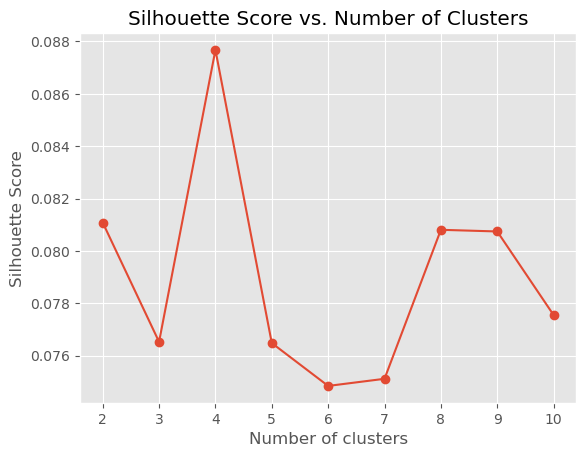

Best number of clusters: 4
Top terms per cluster:
Cluster 0:
 light
 on
 durable
 ideal
 have
 glass
 resistant
 be
 than
 you
Cluster 1:
 light
 system
 resistant
 ideal
 be
 have
 on
 can
 it
 a
Cluster 2:
 light
 resistant
 be
 have
 you
 on
 also
 designed
 design
 ideal
Cluster 3:
 light
 resistant
 be
 have
 than
 ideal
 designed
 also
 at
 includes


In [35]:
import pandas as pd
from gensim.models import Word2Vec
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load your dataset 
df = pd.read_csv("C:\\Users\\geeth\\OneDrive\\Desktop\\ML\\product_descriptions.csv")

# Assuming the DataFrame has a column named 'product_description'
product_descriptions = df['product_description'].tolist()

# Tokenize descriptions into words
tokenized_descriptions = [description.split() 
                          for description in product_descriptions]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_descriptions, 
                          vector_size=100, window=5, min_count=1, workers=4)

# Generate word embeddings for product descriptions
word_embeddings = []
for description in product_descriptions:
    words = description.split()  # Tokenize description into words
    embeddings = []
    for word in words:
        if word in word2vec_model.wv.key_to_index:  # Check if word is in vocabulary
            embedding = word2vec_model.wv[word]
            embeddings.append(embedding)
    if embeddings:  # Check if embeddings exist for any word in the description
        description_embedding = np.mean(embeddings, axis=0)  # Average word embeddings to get description embedding
        word_embeddings.append(description_embedding)

# Check if word_embeddings is empty
if not word_embeddings:
    print("No word embeddings found. Please check if any words in the product descriptions are present in the Word2Vec model's vocabulary.")
else:
    # Convert word embeddings to a 2D array
    X = np.array(word_embeddings)
    
    # Evaluate KMeans clustering performance
    silhouette_scores = []
    for n_clusters in range(2, 11):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(X)
        silhouette_scores.append(silhouette_score(X, cluster_labels))

    # Plot silhouette scores
    plt.plot(range(2, 11), silhouette_scores, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs. Number of Clusters')
    plt.show()

    # Choose the best number of clusters based on the highest silhouette score
    best_n_clusters = np.argmax(silhouette_scores) + 2
    print(f'Best number of clusters: {best_n_clusters}')

    # Perform KMeans clustering with the best number of clusters
    kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)
    y_kmeans = kmeans.fit_predict(X)

    # Print top terms per cluster
    print("Top terms per cluster:")
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = word2vec_model.wv.index_to_key
    for i in range(best_n_clusters):
        print(f"Cluster {i}:")
        for ind in order_centroids[i, :10]:
            print(f' {terms[ind]}')
